In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/Supplement Sales Prediction'
%cd {dir_path}

/content/drive/MyDrive/Colab Notebooks/Supplement Sales Prediction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
train_df = pd.read_csv('TRAIN.csv')
test_df = pd.read_csv('TEST_FINAL.csv')
test_df_cpy = test_df.copy()

In [ ]:
train_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [ ]:
test_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
train_df.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [ ]:
train_df.drop(['ID','#Order'],axis=1,inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

In [ ]:
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52


In [ ]:
# Date
train_date_lst = []
train_year_date_lst = []
train_month_date_lst = []
train_day_date_lst = []
train_weekday_date_lst = []

for d in train_df['Date']:
  train_date_lst.append(dt.datetime.strptime(d,'%Y-%m-%d'))

for year in train_date_lst:
  train_year_date_lst.append(year.strftime('%Y'))

for month in train_date_lst:
  train_month_date_lst.append(month.strftime('%m'))

for day in train_date_lst:
  train_day_date_lst.append(day.strftime('%d'))

for weekday in train_date_lst:
  train_weekday_date_lst.append(weekday.strftime('%A'))
# print(date_lst[0].strftime('%A'))

In [ ]:
# Date
test_date_lst = []
test_year_date_lst = []
test_month_date_lst = []
test_day_date_lst = []
test_weekday_date_lst = []

for d in test_df['Date']:
  test_date_lst.append(dt.datetime.strptime(d,'%Y-%m-%d'))

for year in test_date_lst:
  test_year_date_lst.append(year.strftime('%Y'))

for month in test_date_lst:
  test_month_date_lst.append(month.strftime('%m'))

for day in test_date_lst:
  test_day_date_lst.append(day.strftime('%d'))

for weekday in test_date_lst:
  test_weekday_date_lst.append(weekday.strftime('%A'))
# print(date_lst[0].strftime('%A'))

In [ ]:
train_df['Year'] = pd.Series(train_year_date_lst)
train_df['Month'] = pd.Series(train_month_date_lst)
train_df['Day'] = pd.Series(train_day_date_lst)
train_df['Week Day'] = pd.Series(train_weekday_date_lst)

test_df['Year'] = pd.Series(test_year_date_lst)
test_df['Month'] = pd.Series(test_month_date_lst)
test_df['Day'] = pd.Series(test_day_date_lst)
test_df['Week Day'] = pd.Series(test_weekday_date_lst)

In [ ]:
train_df.drop(['Date'],axis=1,inplace=True)
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day
0,1,S1,L3,R1,1,Yes,7011.84,2018,01,01,Monday
1,253,S4,L2,R1,1,Yes,51789.12,2018,01,01,Monday
2,252,S3,L2,R1,1,Yes,36868.20,2018,01,01,Monday
3,251,S2,L3,R1,1,Yes,19715.16,2018,01,01,Monday
4,250,S2,L3,R4,1,Yes,45614.52,2018,01,01,Monday


In [ ]:
test_df.drop(['Date'],axis=1,inplace=True)
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day,Week Day
0,171,S4,L2,R3,0,No,2019,06,01,Saturday
1,172,S1,L1,R1,0,No,2019,06,01,Saturday
2,173,S4,L2,R1,0,No,2019,06,01,Saturday
3,174,S1,L1,R4,0,No,2019,06,01,Saturday
4,170,S1,L1,R2,0,No,2019,06,01,Saturday


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
train_df['Store_Type'] = encoder.fit_transform(train_df['Store_Type'])
train_df['Location_Type'] = encoder.fit_transform(train_df['Location_Type'])
train_df['Region_Code'] = encoder.fit_transform(train_df['Region_Code'])
train_df['Discount'] = encoder.fit_transform(train_df['Discount'])
train_df['Week Day'] = encoder.fit_transform(train_df['Week Day'])

test_df['Store_Type'] = encoder.fit_transform(test_df['Store_Type'])
test_df['Location_Type'] = encoder.fit_transform(test_df['Location_Type'])
test_df['Region_Code'] = encoder.fit_transform(test_df['Region_Code'])
test_df['Discount'] = encoder.fit_transform(test_df['Discount'])
test_df['Week Day'] = encoder.fit_transform(test_df['Week Day'])

In [ ]:
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day
0,1,0,2,0,1,1,7011.84,2018,01,01,1
1,253,3,1,0,1,1,51789.12,2018,01,01,1
2,252,2,1,0,1,1,36868.20,2018,01,01,1
3,251,1,2,0,1,1,19715.16,2018,01,01,1
4,250,1,2,3,1,1,45614.52,2018,01,01,1


In [ ]:
train_df.groupby(['Year','Holiday'])['Store_id'].count()

Year  Holiday
2018  0          116070
      1           17155
2019  0           47450
      1            7665
Name: Store_id, dtype: int64

In [ ]:
train_df['Holidays in Year'] = train_df.groupby(['Year','Holiday'])['Store_id'].transform('count')
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day,Holidays in Year
0,1,0,2,0,1,1,7011.84,2018,01,01,1,17155
1,253,3,1,0,1,1,51789.12,2018,01,01,1,17155
2,252,2,1,0,1,1,36868.20,2018,01,01,1,17155
3,251,1,2,0,1,1,19715.16,2018,01,01,1,17155
4,250,1,2,3,1,1,45614.52,2018,01,01,1,17155


In [ ]:
test_df['Holidays in Year'] = test_df.groupby(['Year','Holiday'])['Store_id'].transform('count')
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day,Week Day,Holidays in Year
0,171,3,1,2,0,0,2019,06,01,2,21535
1,172,0,0,0,0,0,2019,06,01,2,21535
2,173,3,1,0,0,0,2019,06,01,2,21535
3,174,0,0,3,0,0,2019,06,01,2,21535
4,170,0,0,1,0,0,2019,06,01,2,21535


In [ ]:
train_df.groupby(['Month','Holiday'])['Store_id'].count()

Month  Holiday
01     0          18980
       1           3650
02     0          18615
       1           1825
03     0          18980
       1           3650
04     0          17885
       1           4015
05     0          21170
       1           1460
06     0          10220
       1            730
07     0          10950
       1            365
08     0           9490
       1           1825
09     0           9855
       1           1095
10     0           8760
       1           2555
11     0           8030
       1           2920
12     0          10585
       1            730
Name: Store_id, dtype: int64

In [ ]:
train_df['Holidays in Month'] = train_df.groupby(['Month','Holiday'])['Store_id'].transform('count')
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month
0,1,0,2,0,1,1,7011.84,2018,01,01,1,17155,3650
1,253,3,1,0,1,1,51789.12,2018,01,01,1,17155,3650
2,252,2,1,0,1,1,36868.20,2018,01,01,1,17155,3650
3,251,1,2,0,1,1,19715.16,2018,01,01,1,17155,3650
4,250,1,2,3,1,1,45614.52,2018,01,01,1,17155,3650


In [ ]:
test_df['Holidays in Month'] = test_df.groupby(['Month','Holiday'])['Store_id'].transform('count')
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month
0,171,3,1,2,0,0,2019,06,01,2,21535,10585
1,172,0,0,0,0,0,2019,06,01,2,21535,10585
2,173,3,1,0,0,0,2019,06,01,2,21535,10585
3,174,0,0,3,0,0,2019,06,01,2,21535,10585
4,170,0,0,1,0,0,2019,06,01,2,21535,10585


In [ ]:
train_df.groupby(['Year','Discount'])['Store_id'].count()

Year  Discount
2018  0           72321
      1           60904
2019  0           31730
      1           23385
Name: Store_id, dtype: int64

In [ ]:
train_df['Dicounts in Year'] = train_df.groupby(['Year','Discount'])['Store_id'].transform('count')
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month,Dicounts in Year
0,1,0,2,0,1,1,7011.84,2018,01,01,1,17155,3650,60904
1,253,3,1,0,1,1,51789.12,2018,01,01,1,17155,3650,60904
2,252,2,1,0,1,1,36868.20,2018,01,01,1,17155,3650,60904
3,251,1,2,0,1,1,19715.16,2018,01,01,1,17155,3650,60904
4,250,1,2,3,1,1,45614.52,2018,01,01,1,17155,3650,60904


In [ ]:
test_df['Dicounts in Year'] = test_df.groupby(['Year','Discount'])['Store_id'].transform('count')
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month,Dicounts in Year
0,171,3,1,2,0,0,2019,06,01,2,21535,10585,12773
1,172,0,0,0,0,0,2019,06,01,2,21535,10585,12773
2,173,3,1,0,0,0,2019,06,01,2,21535,10585,12773
3,174,0,0,3,0,0,2019,06,01,2,21535,10585,12773
4,170,0,0,1,0,0,2019,06,01,2,21535,10585,12773


In [ ]:
train_df.groupby(['Month','Discount'])['Store_id'].count()

Month  Discount
01     0           12285
       1           10345
02     0           12325
       1            8115
03     0           11876
       1           10754
04     0           13918
       1            7982
05     0           11644
       1           10986
06     0            5822
       1            5128
07     0            5940
       1            5375
08     0            5732
       1            5583
09     0            5619
       1            5331
10     0            5925
       1            5390
11     0            6504
       1            4446
12     0            6461
       1            4854
Name: Store_id, dtype: int64

In [ ]:
train_df['Dicounts in Month'] = train_df.groupby(['Month','Discount'])['Store_id'].transform('count')
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month,Dicounts in Year,Dicounts in Month
0,1,0,2,0,1,1,7011.84,2018,01,01,1,17155,3650,60904,10345
1,253,3,1,0,1,1,51789.12,2018,01,01,1,17155,3650,60904,10345
2,252,2,1,0,1,1,36868.20,2018,01,01,1,17155,3650,60904,10345
3,251,1,2,0,1,1,19715.16,2018,01,01,1,17155,3650,60904,10345
4,250,1,2,3,1,1,45614.52,2018,01,01,1,17155,3650,60904,10345


In [ ]:
test_df['Dicounts in Month'] = test_df.groupby(['Month','Discount'])['Store_id'].transform('count')
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day,Week Day,Holidays in Year,Holidays in Month,Dicounts in Year,Dicounts in Month
0,171,3,1,2,0,0,2019,06,01,2,21535,10585,12773,6227
1,172,0,0,0,0,0,2019,06,01,2,21535,10585,12773,6227
2,173,3,1,0,0,0,2019,06,01,2,21535,10585,12773,6227
3,174,0,0,3,0,0,2019,06,01,2,21535,10585,12773,6227
4,170,0,0,1,0,0,2019,06,01,2,21535,10585,12773,6227


In [ ]:
train_df['Year'] = train_df['Year'].astype('int')
train_df['Month'] = train_df['Month'].astype('int')
train_df['Day'] = train_df['Day'].astype('int')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store_id           188340 non-null  int64  
 1   Store_Type         188340 non-null  int64  
 2   Location_Type      188340 non-null  int64  
 3   Region_Code        188340 non-null  int64  
 4   Holiday            188340 non-null  int64  
 5   Discount           188340 non-null  int64  
 6   Sales              188340 non-null  float64
 7   Year               188340 non-null  int64  
 8   Month              188340 non-null  int64  
 9   Day                188340 non-null  int64  
 10  Week Day           188340 non-null  int64  
 11  Holidays in Year   188340 non-null  int64  
 12  Holidays in Month  188340 non-null  int64  
 13  Dicounts in Year   188340 non-null  int64  
 14  Dicounts in Month  188340 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 21.6 MB


In [ ]:
test_df['Year'] = test_df['Year'].astype('int')
test_df['Month'] = test_df['Month'].astype('int')
test_df['Day'] = test_df['Day'].astype('int')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Store_id           22265 non-null  int64
 1   Store_Type         22265 non-null  int64
 2   Location_Type      22265 non-null  int64
 3   Region_Code        22265 non-null  int64
 4   Holiday            22265 non-null  int64
 5   Discount           22265 non-null  int64
 6   Year               22265 non-null  int64
 7   Month              22265 non-null  int64
 8   Day                22265 non-null  int64
 9   Week Day           22265 non-null  int64
 10  Holidays in Year   22265 non-null  int64
 11  Holidays in Month  22265 non-null  int64
 12  Dicounts in Year   22265 non-null  int64
 13  Dicounts in Month  22265 non-null  int64
dtypes: int64(14)
memory usage: 2.4 MB


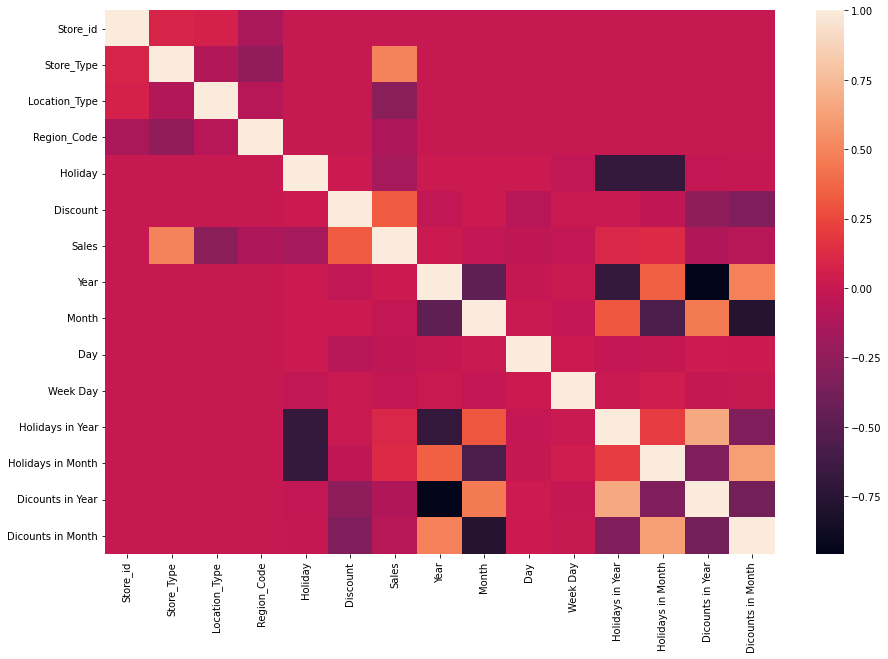

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr())
plt.show()

In [ ]:
train_X = train_df.drop(['Sales'],axis=1)
train_Y = train_df['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.fit_transform(test_df)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(scaled_train_X,train_Y,test_size=0.25,random_state=42)

# Hyper Paramter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
param_grid_lr = {'copy_X':['True','False'],              
              'fit_intercept':['True','False'],
              'normalize':['True','False'],}  
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, refit = True, verbose = 3,n_jobs=-1) 
grid_lr.fit(X_train,Y_train) 

print('\n')

Y1_train_pred = grid_lr.predict(X_train)
Y1_valid_pred = grid_lr.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y1_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y1_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y1_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y1_valid_pred)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.0s finished




Train Accuracy:  0.4348903850828726
Validation Accuracy:  0.43196676736520256

Train RMSE Error:  13894.42257893147
Validation RMSE Error:  13850.4124472943


##K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid_knn = {'n_neighbors':[3,5,11,29],              
              'metric':['euclidean','manhattan'],              
              'weights':['uniform','distance']}  
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, refit = True, verbose = 3,n_jobs=-1) 
grid_knn.fit(X_train,Y_train) 

print('\n')

Y2_train_pred = grid_knn.predict(X_train)
Y2_valid_pred = grid_knn.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y2_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y2_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y2_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y2_valid_pred)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.7min finished




Train Accuracy:  0.7660617981851381
Validation Accuracy:  0.7158108163049239

Train RMSE Error:  8939.736715802404
Validation RMSE Error:  9796.695424926955


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid_dt = {"splitter":["best","random"],
                "max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,40,70,90] }
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, refit = True, verbose = 3,n_jobs=-1) 
grid_dt.fit(X_train,Y_train) 

print('\n')

Y3_train_pred = grid_knn.predict(X_train)
Y3_valid_pred = grid_knn.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y3_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y3_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y3_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y3_valid_pred)))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8128 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 12736 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 15424 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 18368 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed: 10.5min finished




Train Accuracy:  0.7660617981851381
Validation Accuracy:  0.7158108163049239

Train RMSE Error:  8939.736715802404
Validation RMSE Error:  9796.695424926955


## ExtraTree

In [ ]:
from sklearn.tree import ExtraTreeRegressor
ExtraTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [ ]:
param_grid_et = {"splitter":["best","random"],                
                "max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,40,70,90] }

grid_et = GridSearchCV(ExtraTreeRegressor(), param_grid_et, refit = True, verbose = 3, n_jobs=-1) 
grid_et.fit(X_train,Y_train) 

print('\n')

Y4_train_pred = grid_et.predict(X_train)
Y4_valid_pred = grid_et.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y4_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y4_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y4_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y4_valid_pred)))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 770 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 2050 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8962 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 12290 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 16130 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed: 10.8min finished




Train Accuracy:  0.3921955718354272
Validation Accuracy:  0.3890312214409515

Train RMSE Error:  14409.738011005984
Validation RMSE Error:  14364.328972429134


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid_rf = {"max_depth" : [1,5,9,12],
                "min_samples_leaf":[1,3,5,8,10],
                "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
                "max_features":["auto","log2","sqrt"],
                "max_leaf_nodes":[10,20,40,70,90]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, refit = True, verbose = 3, n_jobs=-1, cv=2) 
grid_rf.fit(X_train,Y_train) 

print('\n')

Y5_train_pred = grid_rf.predict(X_train)
Y5_valid_pred = grid_rf.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y5_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y5_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y5_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y5_valid_pred)))

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 39.7min finished




Train Accuracy:  0.4377413444659688
Validation Accuracy:  0.43708213133958107

Train RMSE Error:  13859.32981050398
Validation RMSE Error:  13787.907186234259


## XGBoost

In [ ]:
from xgboost import XGBRegressor
XGBRegressor().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
param_grid_xb = {
  'max_depth':range(3,10,2),
  'min_child_weight':range(1,6,2),
  # 'gamma':[i/10.0 for i in range(0,5)],
  # 'subsample':[i/10.0 for i in range(6,10)],
  'colsample_bytree':[i/10.0 for i in range(6,10)],
  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

grid_xb = GridSearchCV(XGBRegressor(), param_grid_xb, refit = True, verbose = 3, n_jobs=-1, cv=2) 
grid_xb.fit(X_train,Y_train) 

print('\n')

Y6_train_pred = grid_xb.predict(X_train)
Y6_valid_pred = grid_xb.predict(X_valid)

print("Train Accuracy: ",r2_score(Y_train,Y6_train_pred))
print("Validation Accuracy: ",r2_score(Y_valid,Y6_valid_pred))

print('')

print("Train RMSE Error: ",np.sqrt(mean_squared_error(Y_train,Y6_train_pred)))
print("Validation RMSE Error: ",np.sqrt(mean_squared_error(Y_valid,Y6_valid_pred)))

Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 47.9min finished


[16:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Train Accuracy:  0.853619618666769
Validation Accuracy:  0.8257296181777675

Train RMSE Error:  7071.565885010226
Validation RMSE Error:  7671.62958512369


In [ ]:
grid_xb.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 9,
 'min_child_weight': 5,
 'reg_alpha': 0}

In [ ]:
xgb = XGBRegressor(colsample_bytree= 0.8, max_depth= 9, min_child_weight= 5, reg_alpha= 0)
xgb.fit(scaled_train_X,train_Y)

[16:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_test_pred = xgb.predict(scaled_test_X)
pd.concat([test_df_cpy['ID'],pd.DataFrame(Y_test_pred,columns=['Sales'])],axis=1).to_csv('Submission.csv',index=False)
Y_test_pred

array([59021.254, 38402.973, 78268.94 , ..., 43584.17 , 29855.58 ,
       23353.   ], dtype=float32)